In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [39]:
calories = pd.read_csv('calories.csv')

In [40]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [41]:
exercise_data = pd.read_csv('exercise.csv')

In [42]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [43]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [44]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [45]:
calories_data.shape

(15000, 9)

In [46]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [47]:
 calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [48]:
#statistical measures about data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [49]:
sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

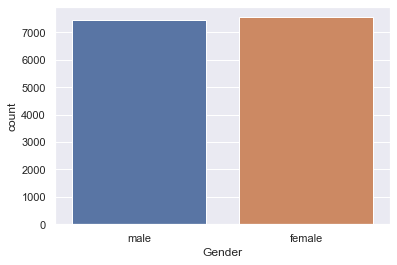

In [50]:
#distribution of males and females
sns.countplot(calories_data['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

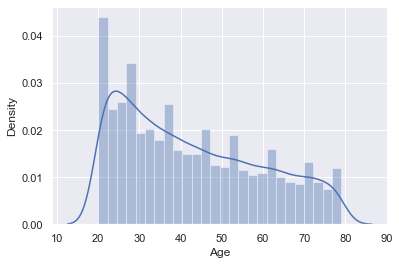

In [51]:
#age distribution
sns.distplot(calories_data['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

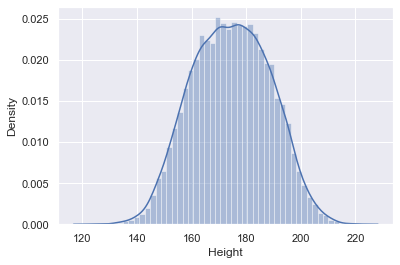

In [52]:
#height distribution
sns.distplot(calories_data['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

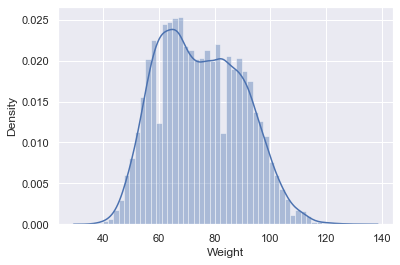

In [53]:
#weight distribution
sns.distplot(calories_data['Weight'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

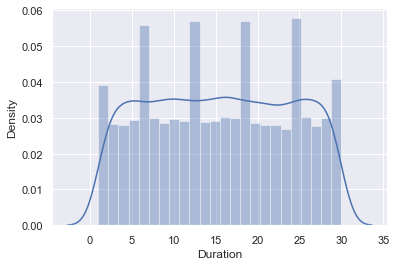

In [54]:
#Duration distribution
sns.distplot(calories_data['Duration'])

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

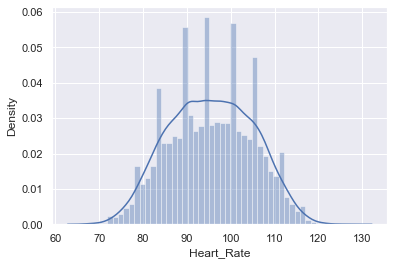

In [55]:
#Heart_Rate distribution
sns.distplot(calories_data['Heart_Rate'])

<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

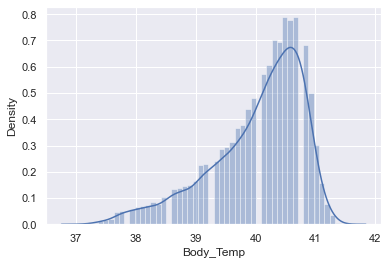

In [56]:
#Body_Temp distribution
sns.distplot(calories_data['Body_Temp'])

In [57]:
#correlation in the dataset
correlation = calories_data.corr()

<AxesSubplot:>

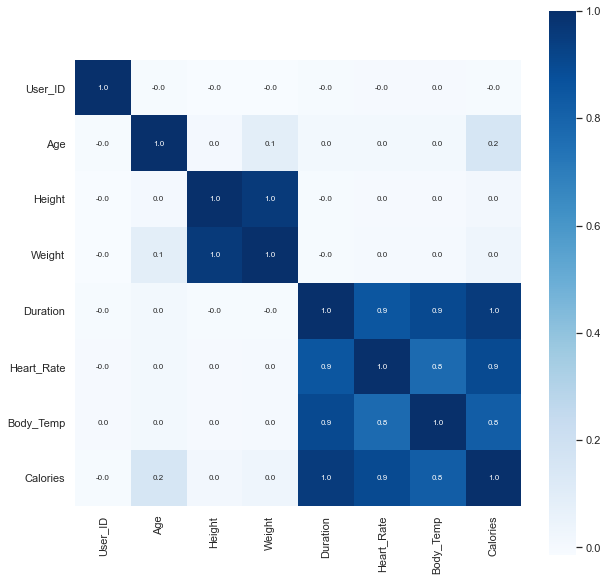

In [58]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [59]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [60]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [61]:
#separating features and Target
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [62]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [63]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [64]:
#splitting the data into training data and Test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
#MODEL TRAINING
model=XGBRegressor()

In [66]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
#evaluating model
test_data_prediction=model.predict(X_test)

In [68]:
#mean absolute Error
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [69]:
print('mean absolute Error=',mae)

mean absolute Error= 1.4807048829992613
